In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [4]:
data = pd.read_csv("../data/train_3.0.csv")
data

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,...,SaleType_WD,Utilities_AllPub,Utilities_NoSeWa,Utilities_missing,YrSold_2006,YrSold_2007,YrSold_2008,YrSold_2009,YrSold_2010,SalePrice
0,856,854.000000,0,3,2,3,706.000000,0.0,1.0,0.0,...,1,1,0,0,0,0,1,0,0,12.247699
1,1262,665.141633,0,3,2,0,978.000000,0.0,0.0,1.0,...,1,1,0,0,0,1,0,0,0,12.109016
2,920,866.000000,0,3,2,2,486.000000,0.0,1.0,0.0,...,1,1,0,0,0,0,1,0,0,12.317171
3,961,756.000000,0,3,1,3,216.000000,0.0,1.0,0.0,...,1,1,0,0,1,0,0,0,0,11.849405
4,1145,1053.000000,0,4,2,1,655.000000,0.0,1.0,0.0,...,1,1,0,0,0,0,1,0,0,12.429220
5,796,566.000000,320,1,2,3,732.000000,0.0,1.0,0.0,...,1,1,0,0,0,0,0,1,0,11.870607
6,1694,665.141633,0,3,2,1,1369.000000,0.0,1.0,0.0,...,1,1,0,0,0,1,0,0,0,12.634606
7,1107,983.000000,0,3,2,2,859.000000,32.0,1.0,0.0,...,1,1,0,0,0,0,0,1,0,12.206078
8,1022,752.000000,0,2,2,3,665.141633,0.0,0.0,0.0,...,1,1,0,0,0,0,1,0,0,11.774528
9,1077,665.141633,0,2,2,3,851.000000,0.0,1.0,0.0,...,1,1,0,0,0,0,1,0,0,11.678448


In [5]:
data.describe(include='all')

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,...,SaleType_WD,Utilities_AllPub,Utilities_NoSeWa,Utilities_missing,YrSold_2006,YrSold_2007,YrSold_2008,YrSold_2009,YrSold_2010,SalePrice
count,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,...,1457.000000,1457.000000,1457.000000,1457.0,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000
mean,1158.505148,723.993323,3.416609,2.866850,1.990391,2.348662,651.554662,46.645161,0.423473,0.057653,...,0.868909,0.999314,0.000686,0.0,0.215511,0.225120,0.207275,0.231984,0.120110,12.023721
std,371.932478,191.064610,29.347109,0.816287,0.296344,1.034727,310.893536,161.471529,0.517362,0.238984,...,0.337616,0.026198,0.026198,0.0,0.411318,0.417805,0.405494,0.422243,0.325202,0.399692
min,334.000000,110.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,10.460271
25%,882.000000,665.141633,0.000000,2.000000,2.000000,2.000000,490.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,11.774528
50%,1086.000000,665.141633,0.000000,3.000000,2.000000,3.000000,665.141633,0.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,12.001512
75%,1390.000000,728.000000,0.000000,3.000000,2.000000,3.000000,708.000000,0.000000,1.000000,0.000000,...,1.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,12.273736
max,3228.000000,2065.000000,508.000000,8.000000,5.000000,3.000000,2188.000000,1474.000000,3.000000,2.000000,...,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,13.534474


In [6]:
missingValues = data.isna().any()
#missingValues.loc[missingValues[1] == True]

#missing data
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
SalePrice,0,0.0
BsmtFinType1_BLQ,0,0.0
BsmtFinType1_LwQ,0,0.0
BsmtFinType1_Rec,0,0.0
BsmtFinType1_Unf.1,0,0.0
BsmtFinType1_missing,0,0.0
BsmtFinType2_ALQ,0,0.0
BsmtFinType2_BLQ,0,0.0
BsmtFinType2_GLQ,0,0.0
BsmtFinType2_LwQ,0,0.0


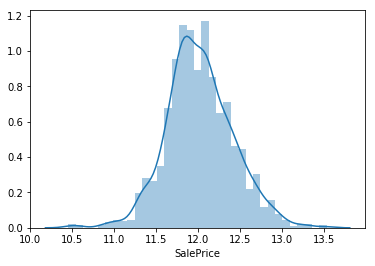

In [7]:
sns.distplot(data['SalePrice'])


In [8]:
corrmat = data.corr()
corrmat

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,...,SaleType_WD,Utilities_AllPub,Utilities_NoSeWa,Utilities_missing,YrSold_2006,YrSold_2007,YrSold_2008,YrSold_2009,YrSold_2010,SalePrice
1stFlrSF,1.000000,0.103096,0.059667,0.131934,-0.066201,-0.298192,0.401553,0.104260,0.230644,0.004710,...,-0.181214,-0.013075,0.013075,NaN,0.002713,0.043930,-0.053311,0.002175,0.003780,0.620138
2ndFlrSF,0.103096,1.000000,-0.011919,0.425506,-0.063620,-0.042156,0.063429,-0.023726,-0.018548,-0.010650,...,-0.023793,0.008075,-0.008075,NaN,0.016151,0.042778,-0.006111,-0.043383,-0.011439,0.470034
3SsnPorch,0.059667,-0.011919,1.000000,-0.024547,0.003777,0.014687,0.002391,-0.030066,0.000314,0.035058,...,-0.014656,0.003052,-0.003052,NaN,-0.016035,-0.033645,0.044624,0.018024,-0.015538,0.055022
BedroomAbvGr,0.131934,0.425506,-0.024547,1.000000,-0.002453,0.119240,-0.068341,-0.015882,-0.150996,0.046419,...,0.048767,-0.004276,0.004276,NaN,0.003701,0.055729,-0.005786,-0.055785,0.003367,0.209982
BsmtCond,-0.066201,-0.063620,0.003777,-0.002453,1.000000,0.082608,-0.009852,-0.079932,-0.080954,-0.060057,...,0.035454,-0.000850,0.000850,NaN,-0.061884,-0.010253,-0.000561,0.061737,0.011984,-0.205232
BsmtExposure,-0.298192,-0.042156,0.014687,0.119240,0.082608,1.000000,-0.269106,-0.091832,-0.322187,-0.075789,...,0.089640,-0.016502,0.016502,NaN,-0.029822,-0.053000,0.007700,0.063119,0.014255,-0.337189
BsmtFinSF1,0.401553,0.063429,0.002391,-0.068341,-0.009852,-0.269106,1.000000,-0.266930,0.397037,-0.007093,...,-0.096384,0.045582,-0.045582,NaN,0.040633,-0.038966,-0.007529,0.021976,-0.020477,0.383513
BsmtFinSF2,0.104260,-0.023726,-0.030066,-0.015882,-0.079932,-0.091832,-0.266930,1.000000,0.160375,0.070815,...,0.035405,-0.049901,0.049901,NaN,-0.021908,-0.008700,0.013072,-0.013539,0.040168,0.005078
BsmtFullBath,0.230644,-0.018548,0.000314,-0.150996,-0.080954,-0.322187,0.397037,0.160375,1.000000,-0.147603,...,0.030998,0.021459,-0.021459,NaN,-0.003132,-0.098179,0.039650,0.015299,0.060793,0.236473
BsmtHalfBath,0.004710,-0.010650,0.035058,0.046419,-0.060057,-0.075789,-0.007093,0.070815,-0.147603,1.000000,...,0.025636,-0.103374,0.103374,NaN,-0.000719,0.041890,0.018348,-0.010118,-0.062649,-0.004948


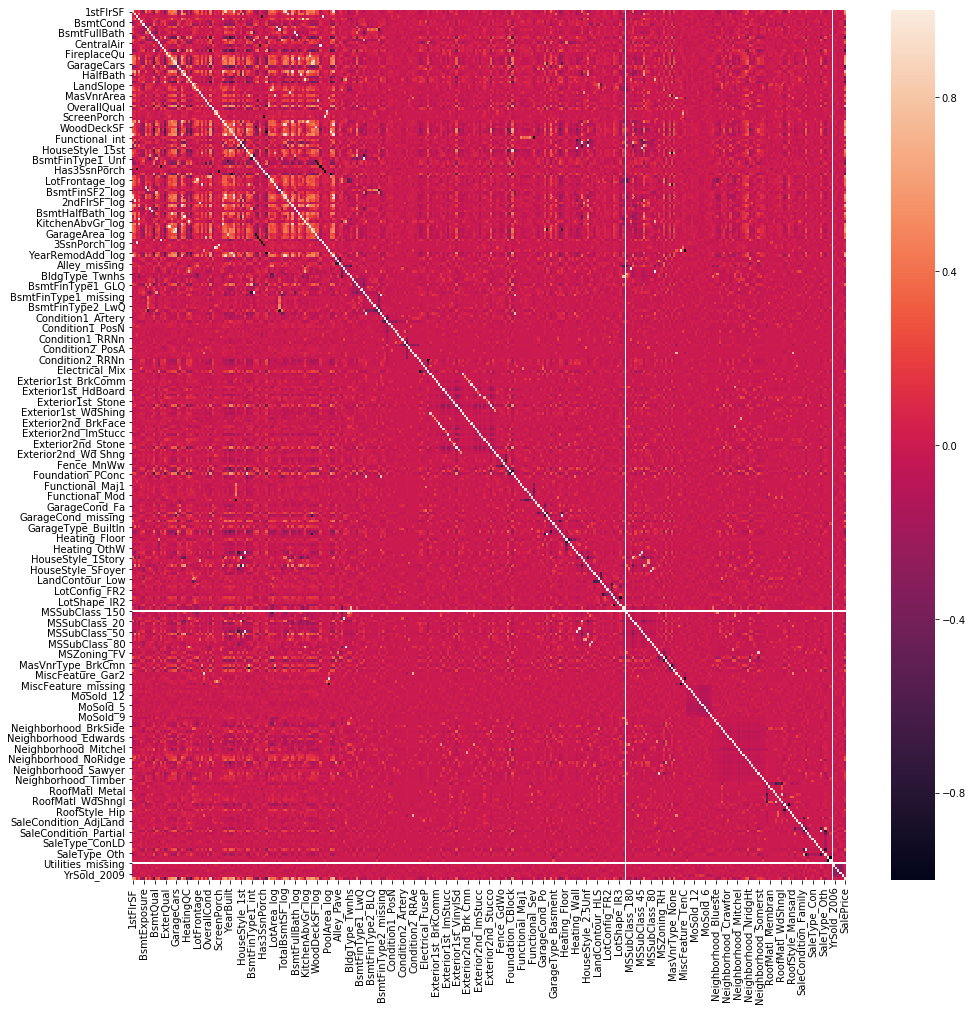

In [9]:
plt.figure(figsize=(16, 16))
sns.heatmap(corrmat)

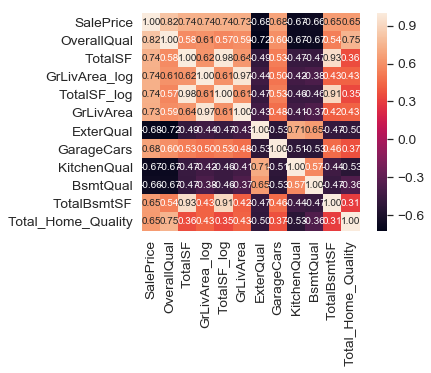

In [11]:
k = 12
abscol = corrmat.abs()
cols = abscol.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(data[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

Features intéressantes:

OverallQual
GrLivArea
GarageCars
TotalBsmtSF
FullBath
TotRmsAbvGrd
YearBuilt
YearRemodAdd

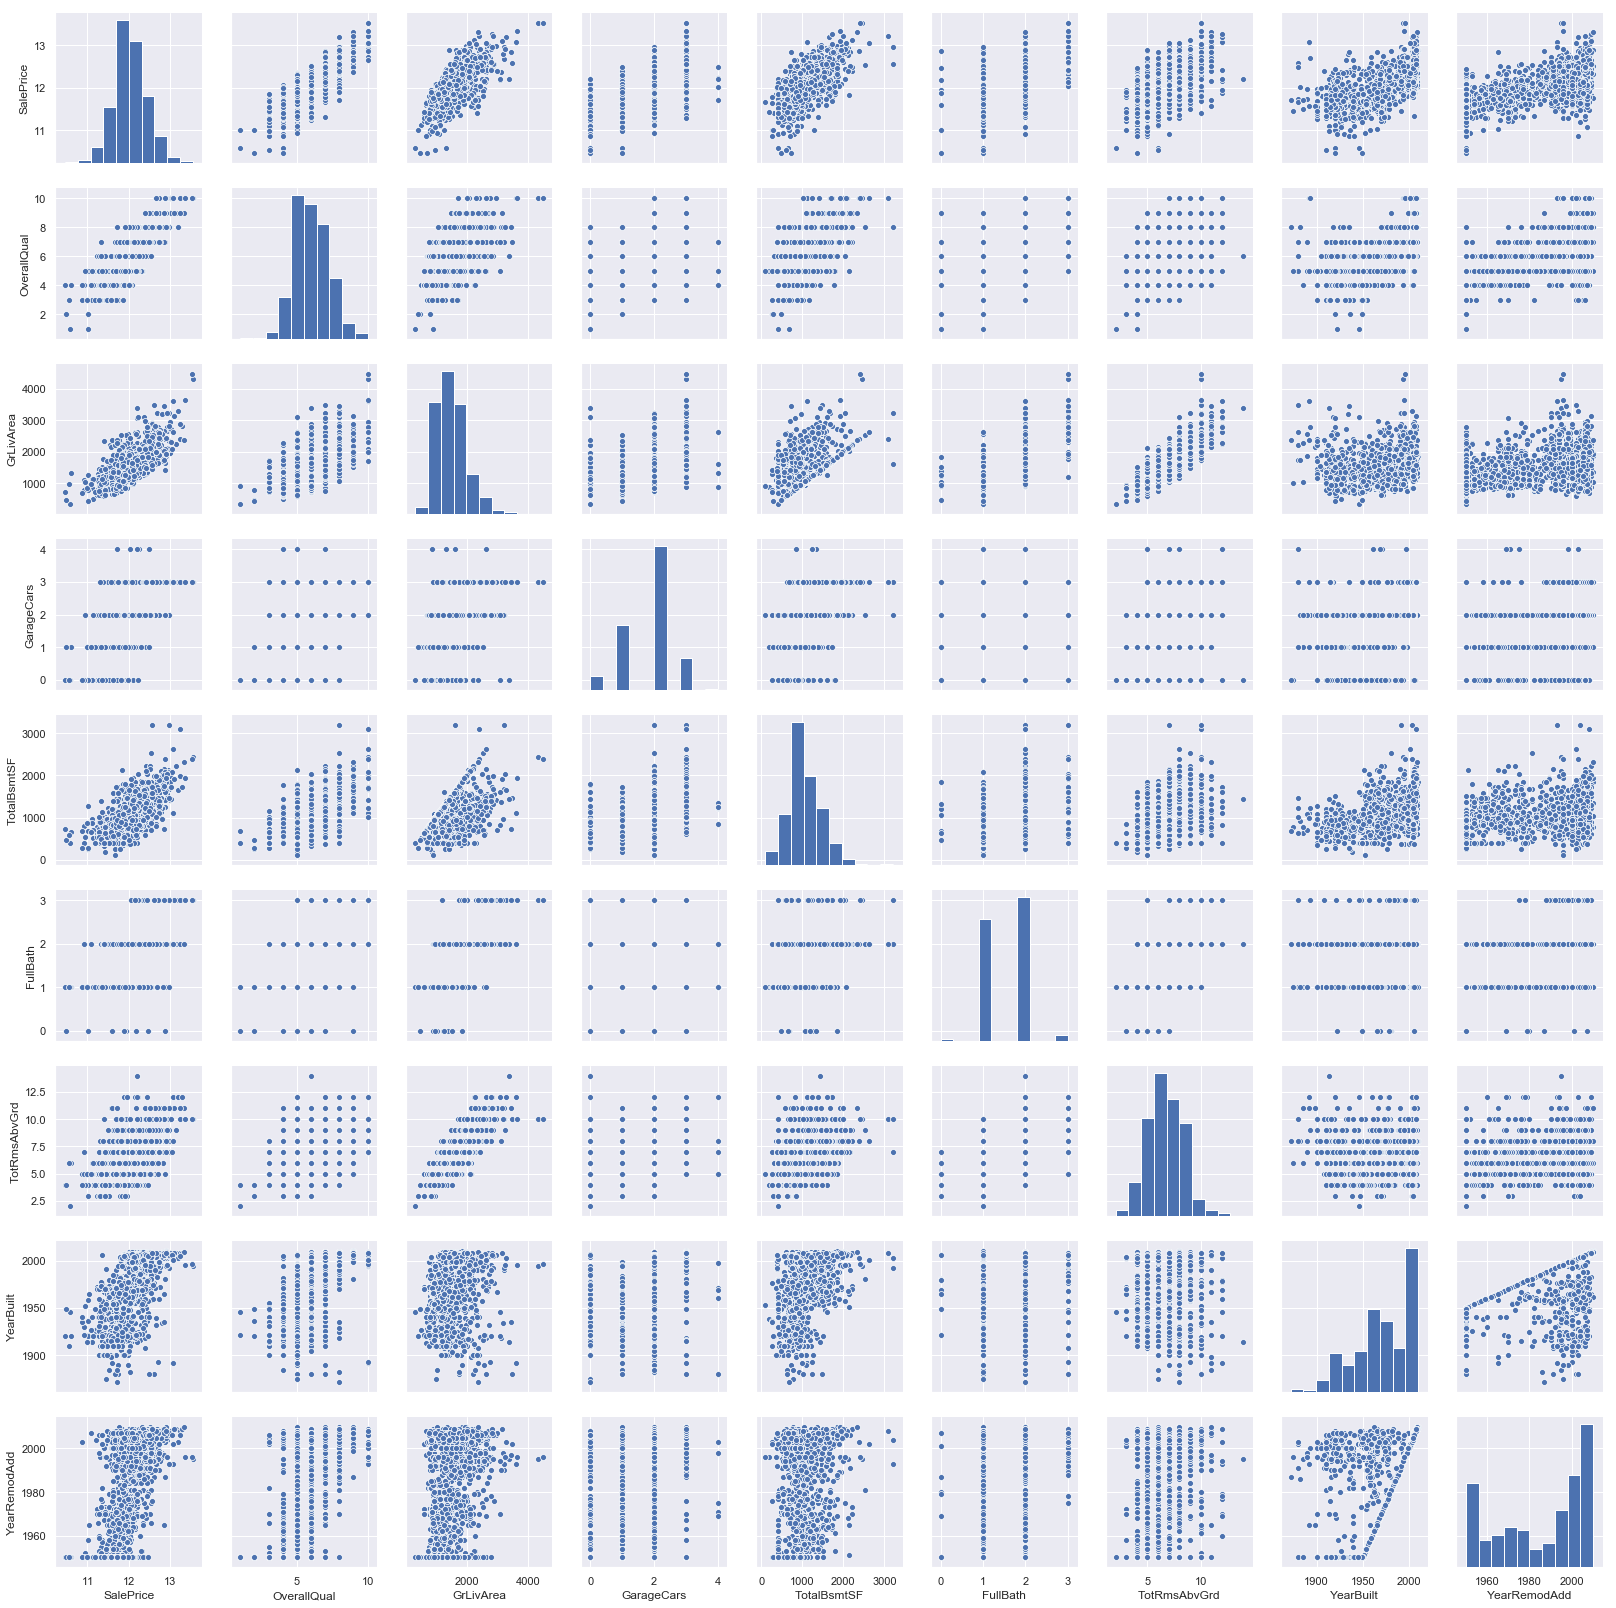

In [12]:
#scatterplot
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd']
sns.pairplot(data[cols], size = 2.5)
plt.show();

In [36]:
data = pd.read_csv("../data/non_null.csv")
data_numeric = data[data.dtypes[data.dtypes != "object"].index]

In [49]:
data_numeric

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,8450,7,5,2003,2003,706,0,150,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,9600,6,8,1976,1976,978,0,284,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,11250,7,5,2001,2002,486,0,434,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,9550,7,5,1915,1970,216,0,540,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,14260,8,5,2000,2000,655,0,490,...,192,84,0,0,0,0,0,12,2008,250000
5,6,50,14115,5,5,1993,1995,732,0,64,...,40,30,0,320,0,0,700,10,2009,143000
6,7,20,10084,8,5,2004,2005,1369,0,317,...,255,57,0,0,0,0,0,8,2007,307000
7,8,60,10382,7,6,1973,1973,859,32,216,...,235,204,228,0,0,0,350,11,2009,200000
8,9,50,6120,7,5,1931,1950,0,0,952,...,90,0,205,0,0,0,0,4,2008,129900
9,10,190,7420,5,6,1939,1950,851,0,140,...,0,4,0,0,0,0,0,1,2008,118000


In [52]:

nca = NeighborhoodComponentsAnalysis( n_components = 20,random_state=42)
nca.fit(data_numeric.drop("SalePrice",axis = 1), data['SalePrice']) 

NeighborhoodComponentsAnalysis(callback=None, init='auto', max_iter=50,
                               n_components=20, random_state=42, tol=1e-05,
                               verbose=0, warm_start=False)

In [53]:
nca.get_params

<bound method BaseEstimator.get_params of NeighborhoodComponentsAnalysis(callback=None, init='auto', max_iter=50,
                               n_components=20, random_state=42, tol=1e-05,
                               verbose=0, warm_start=False)>

In [ ]:
nca.transform()